# Perceptron

A Perceptron is composed of a single layer of **TLUs** (threshold logic unit)

## TLU

A TLU is a type of artificial neuron defined by
$$
z = x^T w
$$
In other words, the output is the sum of the inputs multiplied by their weights (determined via training).
A step function is then applied to the output.

# Perceptron

A Perceptron is composed of a single layer of **TLUs** (threshold logic unit)

## TLU

A TLU is a type of artificial neuron defined by
$$
z = x^T w
$$
In other words, the output is the sum of the inputs multiplied by their weights (determined via training).
A step function is then applied to the output.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
iris = load_iris()
X = iris.data[:, (2,3)] # petal length and width
y = (iris.target == 0).astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## Multilayer Perceptron

![Linear model diagram](https://media.datacamp.com/legacy/v1725638284/image_bd3b978959.png)

The input layer uses __passthrough__ TLUs,
There can be multiple middle (or __hidden__) layers. Each layer also has a single bias neuron and all neurons in a layer are connected to all neurons in the next layer.
The final __output__ layer provides the final result.

### Backpropagation

Training algorithm.
1. Makes a prediction for each training instance in a small batch.
2. Calculates error.
3. Goes back through each layer in reverse order to measure contribution of each connection to the error.
4. Then applies **gradient descent** to tweak the connection weights.

### Activation functions

Backpropagation does not work with the step function because of how gradient descent works (TODO: Understand this)

Logistic function was the first alternative used:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
The derivative is not 0 at any point --> gradient descent can always work.
Ranges from 0 to 1.

Hyperbolic tangent:
Ranges from -1 to 1 and is also continuous and differentiable.
Centered around 0 can help speed up convergence (TODO: WHY???)
$$
\tanh(z) = 2\sigma(2z) - 1
$$

Rectified Linear Unit function:
Not differentiable at 0 and gradient 0 at < 0, but very fast.
$$
R(z) = max(0, z)
$$


## Sequential API

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
# Scale values down to 0-1 range for use in Gradient Descent

X_validation = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0
y_validation = y_train_full[:5000]
y_train = y_train_full[5000:]
X_test = X_test/255.0

class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
# Preprocessing layer to convert matrix to array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6718 - loss: 1.0155 - val_accuracy: 0.8268 - val_loss: 0.5127
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8249 - loss: 0.5012 - val_accuracy: 0.8284 - val_loss: 0.5058
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8410 - loss: 0.4516 - val_accuracy: 0.8436 - val_loss: 0.4375
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8536 - loss: 0.4182 - val_accuracy: 0.8550 - val_loss: 0.4266
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8588 - loss: 0.4067 - val_accuracy: 0.8690 - val_loss: 0.3810
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8648 - loss: 0.3864 - val_accuracy: 0.8682 - val_loss: 0.3837
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.8691 - loss: 0.3729 - val_accuracy: 0.8744 - val_loss: 0.3685
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.8734 - loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

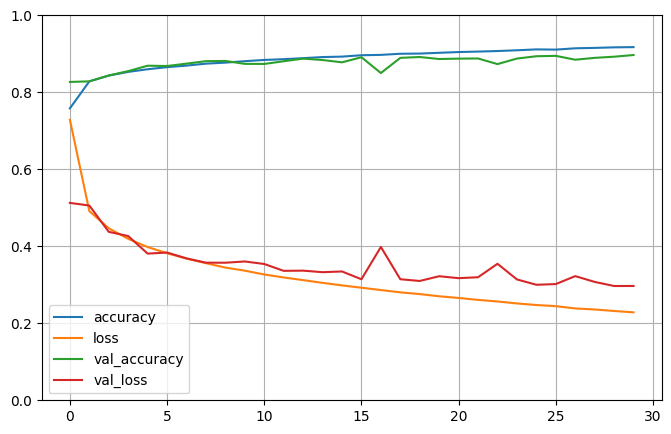

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

## Complex models and the Dynamic API

Revie Wide & Deep neural networks (https://homl.info/widedeep).
- An architecture which supports learning complex and simple patterns.

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
# input_ = keras.layers.Flatten(input_shape=[28, 28])
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()
print(X_train.shape[1:])


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 28, 100)   │      2,900 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 28, 30)    │      3,030 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 28, 58)    │          0 │ input_layer_5[0]… │
│ (Concatenate)       │                   │            │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 28, 1)     │         59 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,989 (23.39 KB)

 Trainable params: 5,989 (23.39 KB)

 Non-trainable params: 0 (0.00 B)

(28, 28)


In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

Epoch 1/30
  47/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1104 - loss: 14.8469    

/Users/jesusdiazrivero/Documents/pocs/handson-ml-with-python/.venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_31']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0983 - loss: 8.8852 - val_accuracy: 0.1112 - val_loss: 8.2354
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1024 - loss: 8.2600 - val_accuracy: 0.1112 - val_loss: 8.2816
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1002 - loss: 8.2867 - val_accuracy: 0.1112 - val_loss: 8.2526
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0987 - loss: 8.2655 - val_accuracy: 0.1112 - val_loss: 8.3114
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0996 - loss: 8.2532 - val_accuracy: 0.1112 - val_loss: 8.3061
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0992 - loss: 8.2941 - val_accuracy: 0.1112 - val_loss: 8.2336
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0975 - loss: 8.2443 - val_accuracy: 0.1112 - val_loss: 8.2370
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1004 - loss: 8.2627 - val_accurac

<function matplotlib.pyplot.show(close=None, block=None)>

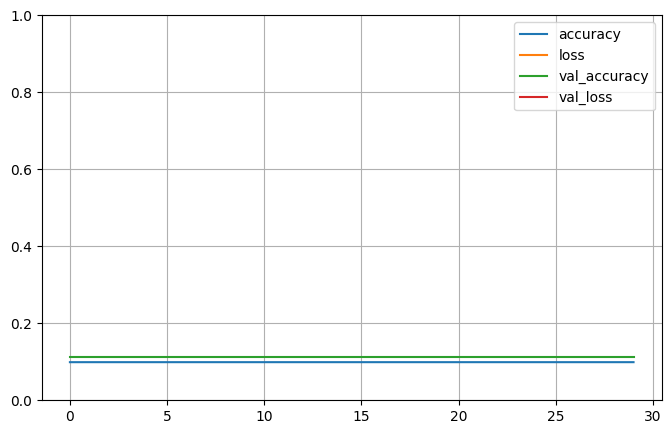

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

## Subclassing API

Used to build dynamic models.

Downsides:
- model architecture is hidden in the call function
- summary method doesn't provide detailed information

In [ ]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        # Sample model with two outputs
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

## Callbacks

Callbacks are sent to the `fit()` method as a way to enhance functionalities of Keras.
They are called ath the start and end of training, each epoch, and even before and after each batch.

### ModelCheckpoint

Saves versions of the model after each training run, can optionally be set to eventually keep only the best performing model

In [ ]:
model.summary()

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
# TODO: Debug why this doesn't work with Subclassing API model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.6888 - loss: 0.9760
Epoch 2/10
 210/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.8213 - loss: 0.5147

/Users/jesusdiazrivero/Documents/pocs/handson-ml-with-python/.venv/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.8277 - loss: 0.4974
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8453 - loss: 0.4482
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8532 - loss: 0.4200
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8579 - loss: 0.4032
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8651 - loss: 0.3833
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.8712 - loss: 0.3649
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8735 - loss: 0.3572
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.8762 - loss: 0.3438
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8794 - loss: 0.3339


## Tensorboard

Out of the box visualization tool to visualize training curves.
- Need to define a log location for data writing.
- Recommended to set program to write logs to subdirectories within locations for each run --> you can view changes live as they occur
- Data is written as __event files__ to binary log files
- Each binary data is a __summary__

Run Tensorboard server:
```
tensorboard --logdir=./chapter-10/logs --port=6006
```

In [ ]:
import os

root_logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
# Use Tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation), callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.8820 - loss: 0.3313 - val_accuracy: 0.8820 - val_loss: 0.3375
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.8874 - loss: 0.3153 - val_accuracy: 0.8802 - val_loss: 0.3356
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8880 - loss: 0.3132 - val_accuracy: 0.8778 - val_loss: 0.3370
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.8909 - loss: 0.3014 - val_accuracy: 0.8810 - val_loss: 0.3342
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8891 - loss: 0.3061 - val_accuracy: 0.8826 - val_loss: 0.3251
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.8956 - loss: 0.2882 - val_accuracy: 0.8862 - val_loss: 0.3183
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.8959 - loss: 0.2855 - val_accuracy: 0.8858 - val_loss: 0.3090
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8987 -

## MNIST MLP

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=42)
X_train = X_train / 255.0
X_val = X_val / 255.0

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
model = keras.models.Sequential()
# Preprocessing layer to convert matrix to array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

/Users/jesusdiazrivero/Documents/pocs/handson-ml-with-python/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.7090 - loss: 1.1146 - val_accuracy: 0.8966 - val_loss: 0.3597
Epoch 2/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9009 - loss: 0.3436 - val_accuracy: 0.9187 - val_loss: 0.2840
Epoch 3/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9220 - loss: 0.2761 - val_accuracy: 0.9308 - val_loss: 0.2476
Epoch 4/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9344 - loss: 0.2363 - val_accuracy: 0.9342 - val_loss: 0.2271
Epoch 5/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.9393 - loss: 0.2079 - val_accuracy: 0.9438 - val_loss: 0.2007
Epoch 6/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9461 - loss: 0.1895 - val_accuracy: 0.9454 - val_loss: 0.1942
Epoch 7/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9506 - loss: 0.1718 - val_accuracy: 0.9492 - val_loss: 0.1752
Epoch 8/30
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.9591 -

<function matplotlib.pyplot.show(close=None, block=None)>

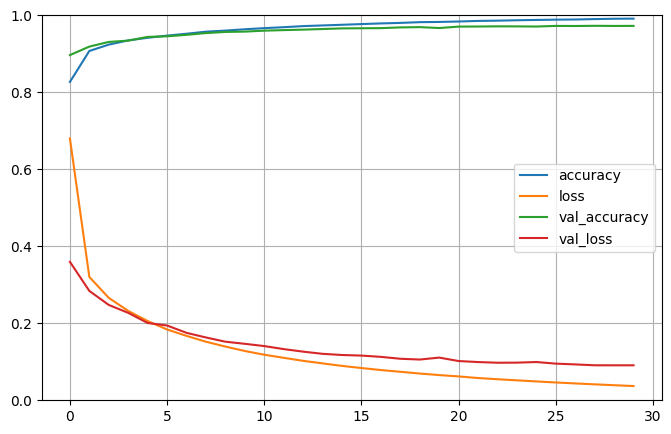

In [ ]:
# First basic run copying fashion MNIST

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))


{'accuracy': [0.8268656730651855, 0.9073134064674377, 0.9237562417984009, 0.934726357460022, 0.9415422677993774, 0.9471641778945923, 0.9520397782325745, 0.9574378132820129, 0.9602238535881042, 0.9636567234992981, 0.9666169285774231, 0.9690298438072205, 0.9718905687332153, 0.9736069440841675, 0.9753233790397644, 0.9771144390106201, 0.9788557291030884, 0.9801989793777466, 0.9821392893791199, 0.9826616644859314, 0.9838557243347168, 0.9853482842445374, 0.9860199093818665, 0.9870895743370056, 0.987885594367981, 0.9886318445205688, 0.9890547394752502, 0.9900994896888733, 0.9909950494766235, 0.9912935495376587], 'loss': [0.680206835269928, 0.32028037309646606, 0.2659744620323181, 0.2321206033229828, 0.20581300556659698, 0.183843195438385, 0.16728904843330383, 0.1521000862121582, 0.13952773809432983, 0.12798050045967102, 0.11831407994031906, 0.11031690984964371, 0.10243489593267441, 0.0958087369799614, 0.08928222954273224, 0.08374524116516113, 0.07853478193283081, 0.0740123987197876, 0.0694545

<function matplotlib.pyplot.show(close=None, block=None)>

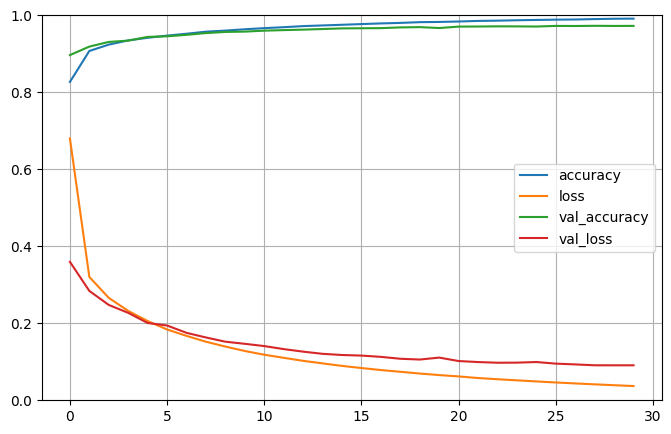

In [ ]:

print(history.history)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
# Cross validation search to find optimal loss

from typing import List


def build_model(X, y, n_neurons: List[str], learning_rate: float):
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(28*28,)))
    model.add(keras.layers.Dense(n_neurons[0], activation="relu"))
    model.add(keras.layers.Dense(n_neurons[1], activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
    return model




In [ ]:
X_train.shape

(40200, 28, 28)

In [ ]:
from scipy.stats import reciprocal

sk_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
sk_val = X_val.reshape((X_val.shape[0],X_val.shape[1]*X_val.shape[2]))

learning_rates = np.logspace(-3, 2, 10)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
histories = {}

for rate in learning_rates:
    checkpoint_cb = keras.callbacks.ModelCheckpoint(f"my_keras_model_{rate}.keras", save_best_only=True)
    dummy_model = build_model(X_train, y_train, [300, 100], learning_rate=rate)
    histories[rate] = dummy_model.fit(sk_train, y_train, epochs=30, validation_data=(sk_val, y_val), callbacks=[tensorboard_cb, checkpoint_cb])
    

# model = keras.wrappers.SKLearnClassifier(model=build_model, model_kwargs={
#     "n_neurons": [300, 100],
#     "learning_rate": 3e-4
# })


# print(sk_train.shape)
# model.fit(sk_train, y_train, epochs=30, validation_data=(sk_val, y_val))

Epoch 1/30


1257/1257 - 3s - 3ms/step - accuracy: 0.4744 - loss: 1.9069 - val_accuracy: 0.6979 - val_loss: 1.4669
Epoch 2/30


1257/1257 - 1s - 1ms/step - accuracy: 0.7690 - loss: 1.1321 - val_accuracy: 0.8111 - val_loss: 0.8807
Epoch 3/30


1257/1257 - 1s - 873us/step - accuracy: 0.8335 - loss: 0.7452 - val_accuracy: 0.8488 - val_loss: 0.6451
Epoch 4/30


1257/1257 - 1s - 815us/step - accuracy: 0.8584 - loss: 0.5843 - val_accuracy: 0.8664 - val_loss: 0.5344
Epoch 5/30


1257/1257 - 1s - 815us/step - accuracy: 0.8709 - loss: 0.5017 - val_accuracy: 0.8787 - val_loss: 0.4710
Epoch 6/30


1257/1257 - 1s - 851us/step - accuracy: 0.8808 - loss: 0.4515 - val_accuracy: 0.8872 - val_loss: 0.4292
Epoch 7/30


1257/1257 - 1s - 810us/step - accuracy: 0.8874 - loss: 0.4174 - val_accuracy: 0.8938 - val_loss: 0.3997
Epoch 8/30


1257/1257 - 1s - 829us/step - accuracy: 0.8923 - loss: 0.3923 - val_accuracy: 0.8976 - val_loss: 0.3776
Epoch 9/30


1257/1257 - 1s - 825us/step - accuracy: 0.8966 - loss: 0.3730 - val_accuracy: 0.9026 - val_loss: 0.3604
Epoch 10/30


1257/1257 - 1s - 801us/step - accuracy: 0.9007 - loss: 0.3572 - val_accuracy: 0.9060 - val_loss: 0.3464
Epoch 11/30


1257/1257 - 1s - 824us/step - accuracy: 0.9031 - loss: 0.3442 - val_accuracy: 0.9086 - val_loss: 0.3359
Epoch 12/30


1257/1257 - 1s - 880us/step - accuracy: 0.9065 - loss: 0.3330 - val_accuracy: 0.9102 - val_loss: 0.3243
Epoch 13/30


1257/1257 - 1s - 813us/step - accuracy: 0.9086 - loss: 0.3230 - val_accuracy: 0.9129 - val_loss: 0.3162
Epoch 14/30


1257/1257 - 1s - 811us/step - accuracy: 0.9110 - loss: 0.3144 - val_accuracy: 0.9144 - val_loss: 0.3085
Epoch 15/30


1257/1257 - 1s - 809us/step - accuracy: 0.9135 - loss: 0.3066 - val_accuracy: 0.9165 - val_loss: 0.3011
Epoch 16/30


1257/1257 - 1s - 811us/step - accuracy: 0.9149 - loss: 0.2995 - val_accuracy: 0.9185 - val_loss: 0.2942
Epoch 17/30


1257/1257 - 1s - 818us/step - accuracy: 0.9171 - loss: 0.2928 - val_accuracy: 0.9201 - val_loss: 0.2877
Epoch 18/30


1257/1257 - 1s - 813us/step - accuracy: 0.9187 - loss: 0.2866 - val_accuracy: 0.9216 - val_loss: 0.2827
Epoch 19/30


1257/1257 - 1s - 813us/step - accuracy: 0.9201 - loss: 0.2808 - val_accuracy: 0.9232 - val_loss: 0.2775
Epoch 20/30


1257/1257 - 1s - 800us/step - accuracy: 0.9213 - loss: 0.2755 - val_accuracy: 0.9239 - val_loss: 0.2726
Epoch 21/30


1257/1257 - 1s - 797us/step - accuracy: 0.9232 - loss: 0.2705 - val_accuracy: 0.9251 - val_loss: 0.2687
Epoch 22/30


1257/1257 - 1s - 816us/step - accuracy: 0.9241 - loss: 0.2657 - val_accuracy: 0.9265 - val_loss: 0.2642
Epoch 23/30


1257/1257 - 1s - 818us/step - accuracy: 0.9258 - loss: 0.2611 - val_accuracy: 0.9273 - val_loss: 0.2603
Epoch 24/30


1257/1257 - 1s - 830us/step - accuracy: 0.9276 - loss: 0.2566 - val_accuracy: 0.9286 - val_loss: 0.2559
Epoch 25/30


1257/1257 - 1s - 824us/step - accuracy: 0.9285 - loss: 0.2525 - val_accuracy: 0.9298 - val_loss: 0.2529
Epoch 26/30


1257/1257 - 1s - 836us/step - accuracy: 0.9296 - loss: 0.2484 - val_accuracy: 0.9305 - val_loss: 0.2492
Epoch 27/30


1257/1257 - 1s - 815us/step - accuracy: 0.9308 - loss: 0.2446 - val_accuracy: 0.9318 - val_loss: 0.2459
Epoch 28/30


1257/1257 - 1s - 819us/step - accuracy: 0.9315 - loss: 0.2409 - val_accuracy: 0.9318 - val_loss: 0.2423
Epoch 29/30


1257/1257 - 1s - 863us/step - accuracy: 0.9331 - loss: 0.2372 - val_accuracy: 0.9332 - val_loss: 0.2396
Epoch 30/30


1257/1257 - 1s - 893us/step - accuracy: 0.9342 - loss: 0.2338 - val_accuracy: 0.9333 - val_loss: 0.2374
Epoch 1/30


1257/1257 - 1s - 973us/step - accuracy: 0.7311 - loss: 1.1328 - val_accuracy: 0.8638 - val_loss: 0.5657
Epoch 2/30


1257/1257 - 1s - 842us/step - accuracy: 0.8779 - loss: 0.4693 - val_accuracy: 0.8920 - val_loss: 0.4005
Epoch 3/30


1257/1257 - 1s - 823us/step - accuracy: 0.8962 - loss: 0.3754 - val_accuracy: 0.9029 - val_loss: 0.3464
Epoch 4/30


1257/1257 - 1s - 837us/step - accuracy: 0.9065 - loss: 0.3333 - val_accuracy: 0.9133 - val_loss: 0.3151
Epoch 5/30


1257/1257 - 1s - 809us/step - accuracy: 0.9134 - loss: 0.3060 - val_accuracy: 0.9171 - val_loss: 0.2977
Epoch 6/30


1257/1257 - 1s - 798us/step - accuracy: 0.9190 - loss: 0.2854 - val_accuracy: 0.9226 - val_loss: 0.2742
Epoch 7/30


1257/1257 - 1s - 822us/step - accuracy: 0.9236 - loss: 0.2686 - val_accuracy: 0.9269 - val_loss: 0.2616
Epoch 8/30


1257/1257 - 1s - 858us/step - accuracy: 0.9277 - loss: 0.2545 - val_accuracy: 0.9291 - val_loss: 0.2496
Epoch 9/30


1257/1257 - 1s - 827us/step - accuracy: 0.9312 - loss: 0.2419 - val_accuracy: 0.9322 - val_loss: 0.2404
Epoch 10/30


1257/1257 - 1s - 831us/step - accuracy: 0.9348 - loss: 0.2309 - val_accuracy: 0.9347 - val_loss: 0.2320
Epoch 11/30


1257/1257 - 1s - 816us/step - accuracy: 0.9376 - loss: 0.2206 - val_accuracy: 0.9378 - val_loss: 0.2220
Epoch 12/30


1257/1257 - 1s - 820us/step - accuracy: 0.9406 - loss: 0.2116 - val_accuracy: 0.9393 - val_loss: 0.2155
Epoch 13/30


1257/1257 - 1s - 829us/step - accuracy: 0.9424 - loss: 0.2028 - val_accuracy: 0.9411 - val_loss: 0.2088
Epoch 14/30


1257/1257 - 1s - 841us/step - accuracy: 0.9444 - loss: 0.1950 - val_accuracy: 0.9422 - val_loss: 0.2046
Epoch 15/30


1257/1257 - 1s - 834us/step - accuracy: 0.9470 - loss: 0.1876 - val_accuracy: 0.9445 - val_loss: 0.1971
Epoch 16/30


1257/1257 - 1s - 857us/step - accuracy: 0.9491 - loss: 0.1803 - val_accuracy: 0.9475 - val_loss: 0.1889
Epoch 17/30


1257/1257 - 1s - 831us/step - accuracy: 0.9510 - loss: 0.1739 - val_accuracy: 0.9483 - val_loss: 0.1846
Epoch 18/30


1257/1257 - 1s - 914us/step - accuracy: 0.9530 - loss: 0.1677 - val_accuracy: 0.9505 - val_loss: 0.1788
Epoch 19/30


1257/1257 - 1s - 836us/step - accuracy: 0.9551 - loss: 0.1618 - val_accuracy: 0.9516 - val_loss: 0.1758
Epoch 20/30


1257/1257 - 1s - 852us/step - accuracy: 0.9561 - loss: 0.1566 - val_accuracy: 0.9522 - val_loss: 0.1703
Epoch 21/30


1257/1257 - 1s - 835us/step - accuracy: 0.9580 - loss: 0.1513 - val_accuracy: 0.9534 - val_loss: 0.1665
Epoch 22/30


1257/1257 - 1s - 813us/step - accuracy: 0.9592 - loss: 0.1461 - val_accuracy: 0.9544 - val_loss: 0.1639
Epoch 23/30


1257/1257 - 1s - 808us/step - accuracy: 0.9605 - loss: 0.1415 - val_accuracy: 0.9549 - val_loss: 0.1603
Epoch 24/30


1257/1257 - 1s - 806us/step - accuracy: 0.9620 - loss: 0.1373 - val_accuracy: 0.9562 - val_loss: 0.1565
Epoch 25/30


1257/1257 - 1s - 837us/step - accuracy: 0.9629 - loss: 0.1331 - val_accuracy: 0.9572 - val_loss: 0.1531
Epoch 26/30


1257/1257 - 1s - 798us/step - accuracy: 0.9641 - loss: 0.1293 - val_accuracy: 0.9574 - val_loss: 0.1509
Epoch 27/30


1257/1257 - 1s - 804us/step - accuracy: 0.9650 - loss: 0.1255 - val_accuracy: 0.9588 - val_loss: 0.1476
Epoch 28/30


1257/1257 - 1s - 839us/step - accuracy: 0.9664 - loss: 0.1217 - val_accuracy: 0.9588 - val_loss: 0.1460
Epoch 29/30


1257/1257 - 1s - 809us/step - accuracy: 0.9676 - loss: 0.1184 - val_accuracy: 0.9597 - val_loss: 0.1430
Epoch 30/30


1257/1257 - 1s - 798us/step - accuracy: 0.9686 - loss: 0.1151 - val_accuracy: 0.9596 - val_loss: 0.1394
Epoch 1/30


1257/1257 - 1s - 962us/step - accuracy: 0.8466 - loss: 0.6063 - val_accuracy: 0.9108 - val_loss: 0.3170
Epoch 2/30


1257/1257 - 1s - 820us/step - accuracy: 0.9187 - loss: 0.2873 - val_accuracy: 0.9305 - val_loss: 0.2499
Epoch 3/30


1257/1257 - 1s - 814us/step - accuracy: 0.9328 - loss: 0.2339 - val_accuracy: 0.9328 - val_loss: 0.2349
Epoch 4/30


1257/1257 - 1s - 876us/step - accuracy: 0.9429 - loss: 0.2003 - val_accuracy: 0.9437 - val_loss: 0.2013
Epoch 5/30


1257/1257 - 1s - 808us/step - accuracy: 0.9501 - loss: 0.1749 - val_accuracy: 0.9495 - val_loss: 0.1760
Epoch 6/30


1257/1257 - 1s - 796us/step - accuracy: 0.9557 - loss: 0.1557 - val_accuracy: 0.9548 - val_loss: 0.1601
Epoch 7/30


1257/1257 - 1s - 830us/step - accuracy: 0.9602 - loss: 0.1402 - val_accuracy: 0.9570 - val_loss: 0.1514
Epoch 8/30


1257/1257 - 1s - 800us/step - accuracy: 0.9644 - loss: 0.1265 - val_accuracy: 0.9584 - val_loss: 0.1465
Epoch 9/30


1257/1257 - 1s - 800us/step - accuracy: 0.9672 - loss: 0.1153 - val_accuracy: 0.9621 - val_loss: 0.1321
Epoch 10/30


1257/1257 - 1s - 844us/step - accuracy: 0.9708 - loss: 0.1052 - val_accuracy: 0.9618 - val_loss: 0.1312
Epoch 11/30


1257/1257 - 1s - 818us/step - accuracy: 0.9737 - loss: 0.0970 - val_accuracy: 0.9627 - val_loss: 0.1296
Epoch 12/30


1257/1257 - 1s - 808us/step - accuracy: 0.9762 - loss: 0.0888 - val_accuracy: 0.9654 - val_loss: 0.1179
Epoch 13/30


1257/1257 - 1s - 826us/step - accuracy: 0.9774 - loss: 0.0826 - val_accuracy: 0.9673 - val_loss: 0.1118
Epoch 14/30


1257/1257 - 1s - 796us/step - accuracy: 0.9791 - loss: 0.0761 - val_accuracy: 0.9682 - val_loss: 0.1097
Epoch 15/30
1257/1257 - 1s - 813us/step - accuracy: 0.9809 - loss: 0.0711 - val_accuracy: 0.9656 - val_loss: 0.1191
Epoch 16/30


1257/1257 - 1s - 814us/step - accuracy: 0.9824 - loss: 0.0655 - val_accuracy: 0.9694 - val_loss: 0.1044
Epoch 17/30


1257/1257 - 1s - 843us/step - accuracy: 0.9836 - loss: 0.0610 - val_accuracy: 0.9696 - val_loss: 0.1006
Epoch 18/30


1257/1257 - 1s - 792us/step - accuracy: 0.9852 - loss: 0.0568 - val_accuracy: 0.9707 - val_loss: 0.0980
Epoch 19/30
1257/1257 - 1s - 789us/step - accuracy: 0.9860 - loss: 0.0529 - val_accuracy: 0.9713 - val_loss: 0.0992
Epoch 20/30


1257/1257 - 1s - 790us/step - accuracy: 0.9870 - loss: 0.0494 - val_accuracy: 0.9724 - val_loss: 0.0932
Epoch 21/30
1257/1257 - 1s - 796us/step - accuracy: 0.9891 - loss: 0.0456 - val_accuracy: 0.9727 - val_loss: 0.0938
Epoch 22/30


1257/1257 - 1s - 799us/step - accuracy: 0.9895 - loss: 0.0428 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 23/30


1257/1257 - 1s - 797us/step - accuracy: 0.9900 - loss: 0.0400 - val_accuracy: 0.9724 - val_loss: 0.0907
Epoch 24/30


1257/1257 - 1s - 794us/step - accuracy: 0.9908 - loss: 0.0374 - val_accuracy: 0.9732 - val_loss: 0.0898
Epoch 25/30


1257/1257 - 1s - 818us/step - accuracy: 0.9915 - loss: 0.0351 - val_accuracy: 0.9732 - val_loss: 0.0892
Epoch 26/30
1257/1257 - 1s - 793us/step - accuracy: 0.9926 - loss: 0.0328 - val_accuracy: 0.9732 - val_loss: 0.0905
Epoch 27/30


1257/1257 - 1s - 797us/step - accuracy: 0.9930 - loss: 0.0308 - val_accuracy: 0.9741 - val_loss: 0.0867
Epoch 28/30
1257/1257 - 1s - 790us/step - accuracy: 0.9939 - loss: 0.0287 - val_accuracy: 0.9747 - val_loss: 0.0891
Epoch 29/30
1257/1257 - 1s - 788us/step - accuracy: 0.9944 - loss: 0.0269 - val_accuracy: 0.9739 - val_loss: 0.0867
Epoch 30/30


1257/1257 - 1s - 805us/step - accuracy: 0.9948 - loss: 0.0252 - val_accuracy: 0.9743 - val_loss: 0.0856
Epoch 1/30


1257/1257 - 1s - 937us/step - accuracy: 0.8931 - loss: 0.3822 - val_accuracy: 0.9388 - val_loss: 0.2133
Epoch 2/30


1257/1257 - 1s - 830us/step - accuracy: 0.9478 - loss: 0.1777 - val_accuracy: 0.9555 - val_loss: 0.1545
Epoch 3/30
1257/1257 - 1s - 806us/step - accuracy: 0.9637 - loss: 0.1255 - val_accuracy: 0.9239 - val_loss: 0.2656
Epoch 4/30


1257/1257 - 1s - 795us/step - accuracy: 0.9723 - loss: 0.0973 - val_accuracy: 0.9672 - val_loss: 0.1114
Epoch 5/30


1257/1257 - 1s - 794us/step - accuracy: 0.9778 - loss: 0.0762 - val_accuracy: 0.9692 - val_loss: 0.1033
Epoch 6/30


1257/1257 - 1s - 796us/step - accuracy: 0.9827 - loss: 0.0607 - val_accuracy: 0.9720 - val_loss: 0.0935
Epoch 7/30


1257/1257 - 1s - 803us/step - accuracy: 0.9864 - loss: 0.0494 - val_accuracy: 0.9740 - val_loss: 0.0864
Epoch 8/30
1257/1257 - 1s - 796us/step - accuracy: 0.9887 - loss: 0.0399 - val_accuracy: 0.9729 - val_loss: 0.0906
Epoch 9/30


1257/1257 - 1s - 819us/step - accuracy: 0.9913 - loss: 0.0328 - val_accuracy: 0.9738 - val_loss: 0.0852
Epoch 10/30


1257/1257 - 1s - 818us/step - accuracy: 0.9936 - loss: 0.0261 - val_accuracy: 0.9771 - val_loss: 0.0791
Epoch 11/30
1257/1257 - 1s - 796us/step - accuracy: 0.9949 - loss: 0.0218 - val_accuracy: 0.9766 - val_loss: 0.0805
Epoch 12/30
1257/1257 - 1s - 804us/step - accuracy: 0.9962 - loss: 0.0179 - val_accuracy: 0.9773 - val_loss: 0.0806
Epoch 13/30
1257/1257 - 1s - 789us/step - accuracy: 0.9978 - loss: 0.0139 - val_accuracy: 0.9761 - val_loss: 0.0821
Epoch 14/30
1257/1257 - 1s - 796us/step - accuracy: 0.9985 - loss: 0.0114 - val_accuracy: 0.9772 - val_loss: 0.0813
Epoch 15/30
1257/1257 - 1s - 790us/step - accuracy: 0.9985 - loss: 0.0096 - val_accuracy: 0.9767 - val_loss: 0.0835
Epoch 16/30
1257/1257 - 1s - 789us/step - accuracy: 0.9990 - loss: 0.0082 - val_accuracy: 0.9765 - val_loss: 0.0843
Epoch 17/30
1257/1257 - 1s - 797us/step - accuracy: 0.9995 - loss: 0.0063 - val_accuracy: 0.9784 - val_loss: 0.0800
Epoch 18/30
1257/1257 - 1s - 815us/step - accuracy: 0.9995 - loss: 0.0053 - val_accu

1257/1257 - 1s - 944us/step - accuracy: 0.9179 - loss: 0.2714 - val_accuracy: 0.8151 - val_loss: 0.7463
Epoch 2/30


1257/1257 - 1s - 849us/step - accuracy: 0.9661 - loss: 0.1094 - val_accuracy: 0.9686 - val_loss: 0.1040
Epoch 3/30


1257/1257 - 1s - 833us/step - accuracy: 0.9777 - loss: 0.0715 - val_accuracy: 0.9684 - val_loss: 0.0999
Epoch 4/30
1257/1257 - 1s - 829us/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9428 - val_loss: 0.1985
Epoch 5/30


1257/1257 - 1s - 825us/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9699 - val_loss: 0.0992
Epoch 6/30


1257/1257 - 1s - 831us/step - accuracy: 0.9921 - loss: 0.0265 - val_accuracy: 0.9758 - val_loss: 0.0849
Epoch 7/30


1257/1257 - 1s - 857us/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9761 - val_loss: 0.0846
Epoch 8/30
1257/1257 - 1s - 872us/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9758 - val_loss: 0.0914
Epoch 9/30
1257/1257 - 1s - 818us/step - accuracy: 0.9978 - loss: 0.0085 - val_accuracy: 0.9754 - val_loss: 0.1005
Epoch 10/30
1257/1257 - 1s - 814us/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 0.9772 - val_loss: 0.0894
Epoch 11/30
1257/1257 - 1s - 829us/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9787 - val_loss: 0.0916
Epoch 12/30
1257/1257 - 1s - 827us/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9795 - val_loss: 0.0889
Epoch 13/30
1257/1257 - 1s - 813us/step - accuracy: 1.0000 - loss: 8.1829e-04 - val_accuracy: 0.9801 - val_loss: 0.0872
Epoch 14/30
1257/1257 - 1s - 807us/step - accuracy: 1.0000 - loss: 6.0710e-04 - val_accuracy: 0.9799 - val_loss: 0.0888
Epoch 15/30
1257/1257 - 1s - 841us/step - accuracy: 1.0000 - loss: 4.9632e-04 

1257/1257 - 1s - 938us/step - accuracy: 0.9063 - loss: 0.3061 - val_accuracy: 0.8476 - val_loss: 0.7637
Epoch 2/30
1257/1257 - 1s - 845us/step - accuracy: 0.9615 - loss: 0.1289 - val_accuracy: 0.8683 - val_loss: 0.7800
Epoch 3/30


1257/1257 - 1s - 827us/step - accuracy: 0.9716 - loss: 0.0959 - val_accuracy: 0.9575 - val_loss: 0.1495
Epoch 4/30
1257/1257 - 1s - 825us/step - accuracy: 0.9770 - loss: 0.0765 - val_accuracy: 0.9418 - val_loss: 0.2447
Epoch 5/30
1257/1257 - 1s - 818us/step - accuracy: 0.9793 - loss: 0.0663 - val_accuracy: 0.9053 - val_loss: 0.4598
Epoch 6/30


1257/1257 - 1s - 839us/step - accuracy: 0.9827 - loss: 0.0567 - val_accuracy: 0.9695 - val_loss: 0.1300
Epoch 7/30
1257/1257 - 1s - 838us/step - accuracy: 0.9836 - loss: 0.0550 - val_accuracy: 0.9672 - val_loss: 0.1364
Epoch 8/30
1257/1257 - 1s - 821us/step - accuracy: 0.9864 - loss: 0.0457 - val_accuracy: 0.9673 - val_loss: 0.1458
Epoch 9/30
1257/1257 - 1s - 816us/step - accuracy: 0.9886 - loss: 0.0377 - val_accuracy: 0.9664 - val_loss: 0.1474
Epoch 10/30
1257/1257 - 1s - 823us/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9572 - val_loss: 0.2225
Epoch 11/30
1257/1257 - 1s - 815us/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9730 - val_loss: 0.1341
Epoch 12/30
1257/1257 - 1s - 801us/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9731 - val_loss: 0.1330
Epoch 13/30
1257/1257 - 1s - 836us/step - accuracy: 0.9914 - loss: 0.0299 - val_accuracy: 0.9747 - val_loss: 0.1411
Epoch 14/30
1257/1257 - 1s - 807us/step - accuracy: 0.9896 - loss: 0.0370 - val_accurac

1257/1257 - 1s - 963us/step - accuracy: 0.1018 - loss: 796.9032 - val_accuracy: 0.1028 - val_loss: 2.3557
Epoch 2/30


1257/1257 - 1s - 804us/step - accuracy: 0.0999 - loss: 2.3191 - val_accuracy: 0.0980 - val_loss: 2.3243
Epoch 3/30
1257/1257 - 1s - 821us/step - accuracy: 0.1023 - loss: 2.3177 - val_accuracy: 0.0980 - val_loss: 2.3463
Epoch 4/30


1257/1257 - 1s - 810us/step - accuracy: 0.1048 - loss: 2.3181 - val_accuracy: 0.0984 - val_loss: 2.3224
Epoch 5/30
1257/1257 - 1s - 827us/step - accuracy: 0.1030 - loss: 2.3186 - val_accuracy: 0.0983 - val_loss: 2.3302
Epoch 6/30


1257/1257 - 1s - 831us/step - accuracy: 0.1048 - loss: 2.3176 - val_accuracy: 0.1120 - val_loss: 2.3152
Epoch 7/30
1257/1257 - 1s - 831us/step - accuracy: 0.1012 - loss: 2.3191 - val_accuracy: 0.1028 - val_loss: 2.3219
Epoch 8/30
1257/1257 - 1s - 806us/step - accuracy: 0.1026 - loss: 2.3191 - val_accuracy: 0.0969 - val_loss: 2.3567
Epoch 9/30
1257/1257 - 1s - 824us/step - accuracy: 0.1060 - loss: 2.3180 - val_accuracy: 0.0980 - val_loss: 2.3280
Epoch 10/30
1257/1257 - 1s - 824us/step - accuracy: 0.1027 - loss: 2.3188 - val_accuracy: 0.1000 - val_loss: 2.3524
Epoch 11/30
1257/1257 - 1s - 801us/step - accuracy: 0.0971 - loss: 2.3192 - val_accuracy: 0.1071 - val_loss: 2.3348
Epoch 12/30
1257/1257 - 1s - 813us/step - accuracy: 0.1020 - loss: 2.3180 - val_accuracy: 0.1120 - val_loss: 2.3600
Epoch 13/30
1257/1257 - 1s - 814us/step - accuracy: 0.1023 - loss: 2.3177 - val_accuracy: 0.0984 - val_loss: 2.3229
Epoch 14/30
1257/1257 - 1s - 811us/step - accuracy: 0.1031 - loss: 2.3186 - val_accurac

1257/1257 - 1s - 952us/step - accuracy: 0.1011 - loss: 217185.8594 - val_accuracy: 0.0983 - val_loss: 2.5615
Epoch 2/30
1257/1257 - 1s - 844us/step - accuracy: 0.1040 - loss: 2.3953 - val_accuracy: 0.0984 - val_loss: 2.5930
Epoch 3/30
1257/1257 - 1s - 830us/step - accuracy: 0.1024 - loss: 2.3983 - val_accuracy: 0.1000 - val_loss: 2.7558
Epoch 4/30


1257/1257 - 1s - 797us/step - accuracy: 0.1033 - loss: 2.3992 - val_accuracy: 0.1000 - val_loss: 2.5547
Epoch 5/30
1257/1257 - 1s - 834us/step - accuracy: 0.1018 - loss: 2.3983 - val_accuracy: 0.0957 - val_loss: 2.7937
Epoch 6/30
1257/1257 - 1s - 815us/step - accuracy: 0.1008 - loss: 2.3965 - val_accuracy: 0.0909 - val_loss: 2.6599
Epoch 7/30
1257/1257 - 1s - 793us/step - accuracy: 0.1026 - loss: 2.3991 - val_accuracy: 0.0980 - val_loss: 2.8962
Epoch 8/30
1257/1257 - 1s - 810us/step - accuracy: 0.0985 - loss: 2.4011 - val_accuracy: 0.1000 - val_loss: 2.5748
Epoch 9/30
1257/1257 - 1s - 785us/step - accuracy: 0.1006 - loss: 2.3980 - val_accuracy: 0.1071 - val_loss: 2.5954
Epoch 10/30


1257/1257 - 1s - 816us/step - accuracy: 0.1028 - loss: 2.3967 - val_accuracy: 0.0980 - val_loss: 2.4956
Epoch 11/30
1257/1257 - 1s - 826us/step - accuracy: 0.1020 - loss: 2.3944 - val_accuracy: 0.0980 - val_loss: 2.5845
Epoch 12/30


1257/1257 - 1s - 808us/step - accuracy: 0.0991 - loss: 2.3986 - val_accuracy: 0.0980 - val_loss: 2.4936
Epoch 13/30
1257/1257 - 1s - 823us/step - accuracy: 0.1005 - loss: 2.4005 - val_accuracy: 0.1071 - val_loss: 2.9474
Epoch 14/30
1257/1257 - 1s - 789us/step - accuracy: 0.1004 - loss: 2.4003 - val_accuracy: 0.0983 - val_loss: 2.7208
Epoch 15/30
1257/1257 - 1s - 815us/step - accuracy: 0.0985 - loss: 2.4022 - val_accuracy: 0.1028 - val_loss: 2.5925
Epoch 16/30
1257/1257 - 1s - 857us/step - accuracy: 0.0999 - loss: 2.4003 - val_accuracy: 0.1000 - val_loss: 2.5450
Epoch 17/30


1257/1257 - 1s - 811us/step - accuracy: 0.1028 - loss: 2.3942 - val_accuracy: 0.0957 - val_loss: 2.4374
Epoch 18/30
1257/1257 - 1s - 823us/step - accuracy: 0.1010 - loss: 2.4008 - val_accuracy: 0.1071 - val_loss: 2.8823
Epoch 19/30
1257/1257 - 1s - 811us/step - accuracy: 0.0998 - loss: 2.3979 - val_accuracy: 0.1028 - val_loss: 2.7644
Epoch 20/30
1257/1257 - 1s - 816us/step - accuracy: 0.1000 - loss: 2.3990 - val_accuracy: 0.0980 - val_loss: 2.4507
Epoch 21/30


1257/1257 - 1s - 815us/step - accuracy: 0.1012 - loss: 2.4018 - val_accuracy: 0.0909 - val_loss: 2.3858
Epoch 22/30
1257/1257 - 1s - 848us/step - accuracy: 0.1036 - loss: 2.3967 - val_accuracy: 0.1000 - val_loss: 2.5985
Epoch 23/30
1257/1257 - 1s - 815us/step - accuracy: 0.1010 - loss: 2.4017 - val_accuracy: 0.1071 - val_loss: 2.6706
Epoch 24/30
1257/1257 - 1s - 809us/step - accuracy: 0.1045 - loss: 2.3950 - val_accuracy: 0.1028 - val_loss: 3.0791
Epoch 25/30
1257/1257 - 1s - 799us/step - accuracy: 0.1041 - loss: 2.3969 - val_accuracy: 0.0957 - val_loss: 2.9332
Epoch 26/30
1257/1257 - 1s - 816us/step - accuracy: 0.1023 - loss: 2.3964 - val_accuracy: 0.0909 - val_loss: 2.6731
Epoch 27/30
1257/1257 - 1s - 819us/step - accuracy: 0.1018 - loss: 2.3990 - val_accuracy: 0.1071 - val_loss: 2.5267
Epoch 28/30
1257/1257 - 1s - 802us/step - accuracy: 0.0997 - loss: 2.3986 - val_accuracy: 0.1120 - val_loss: 2.5527
Epoch 29/30
1257/1257 - 1s - 837us/step - accuracy: 0.1034 - loss: 2.3967 - val_accu

1257/1257 - 1s - 944us/step - accuracy: 0.1020 - loss: 12209861855978700188680192.0000 - val_accuracy: 0.1028 - val_loss: 7.2779
Epoch 2/30
1257/1257 - 1s - 819us/step - accuracy: 0.0992 - loss: 7.1673 - val_accuracy: 0.0980 - val_loss: 9.6306
Epoch 3/30


1257/1257 - 1s - 831us/step - accuracy: 0.1011 - loss: 7.0454 - val_accuracy: 0.1000 - val_loss: 7.2540
Epoch 4/30


1257/1257 - 1s - 835us/step - accuracy: 0.1033 - loss: 7.1580 - val_accuracy: 0.1028 - val_loss: 5.9135
Epoch 5/30
1257/1257 - 1s - 826us/step - accuracy: 0.1000 - loss: 7.0634 - val_accuracy: 0.0969 - val_loss: 6.5360
Epoch 6/30


1257/1257 - 1s - 822us/step - accuracy: 0.1009 - loss: 7.2345 - val_accuracy: 0.0984 - val_loss: 5.1798
Epoch 7/30
1257/1257 - 1s - 829us/step - accuracy: 0.0984 - loss: 7.2652 - val_accuracy: 0.0980 - val_loss: 14.8355
Epoch 8/30
1257/1257 - 1s - 816us/step - accuracy: 0.1021 - loss: 6.8991 - val_accuracy: 0.0980 - val_loss: 10.2615
Epoch 9/30
1257/1257 - 1s - 831us/step - accuracy: 0.0987 - loss: 7.1396 - val_accuracy: 0.0984 - val_loss: 14.7512
Epoch 10/30
1257/1257 - 1s - 815us/step - accuracy: 0.0995 - loss: 7.0723 - val_accuracy: 0.0983 - val_loss: 11.0125
Epoch 11/30
1257/1257 - 1s - 806us/step - accuracy: 0.1027 - loss: 7.0754 - val_accuracy: 0.0957 - val_loss: 8.2910
Epoch 12/30
1257/1257 - 1s - 817us/step - accuracy: 0.0978 - loss: 7.1088 - val_accuracy: 0.0957 - val_loss: 10.1803
Epoch 13/30
1257/1257 - 1s - 818us/step - accuracy: 0.1029 - loss: 6.8982 - val_accuracy: 0.1000 - val_loss: 7.8273
Epoch 14/30
1257/1257 - 1s - 809us/step - accuracy: 0.1028 - loss: 7.0645 - val_ac

1257/1257 - 1s - 821us/step - accuracy: 0.1008 - loss: 7.0855 - val_accuracy: 0.0980 - val_loss: 5.0086
Epoch 18/30
1257/1257 - 1s - 813us/step - accuracy: 0.1035 - loss: 7.1413 - val_accuracy: 0.0969 - val_loss: 10.3418
Epoch 19/30


1257/1257 - 1s - 819us/step - accuracy: 0.1002 - loss: 7.1088 - val_accuracy: 0.1071 - val_loss: 3.8346
Epoch 20/30
1257/1257 - 1s - 792us/step - accuracy: 0.1021 - loss: 7.0474 - val_accuracy: 0.0984 - val_loss: 8.3641
Epoch 21/30
1257/1257 - 1s - 807us/step - accuracy: 0.1030 - loss: 6.9538 - val_accuracy: 0.0983 - val_loss: 8.0132
Epoch 22/30
1257/1257 - 1s - 824us/step - accuracy: 0.1003 - loss: 7.0117 - val_accuracy: 0.0909 - val_loss: 8.5255
Epoch 23/30
1257/1257 - 1s - 804us/step - accuracy: 0.1011 - loss: 6.8750 - val_accuracy: 0.0983 - val_loss: 15.2325
Epoch 24/30
1257/1257 - 1s - 821us/step - accuracy: 0.1010 - loss: 6.9328 - val_accuracy: 0.1000 - val_loss: 10.6784
Epoch 25/30
1257/1257 - 1s - 803us/step - accuracy: 0.0995 - loss: 6.8945 - val_accuracy: 0.0909 - val_loss: 10.9462
Epoch 26/30
1257/1257 - 1s - 810us/step - accuracy: 0.1000 - loss: 7.0746 - val_accuracy: 0.0984 - val_loss: 8.8575
Epoch 27/30
1257/1257 - 1s - 791us/step - accuracy: 0.1007 - loss: 7.1330 - val_a

1257/1257 - 1s - 969us/step - accuracy: 0.1022 - loss: 650262857878259892224.0000 - val_accuracy: 0.0969 - val_loss: 54.6555
Epoch 2/30


1257/1257 - 1s - 841us/step - accuracy: 0.0992 - loss: 42.4884 - val_accuracy: 0.1000 - val_loss: 36.4648
Epoch 3/30
1257/1257 - 1s - 837us/step - accuracy: 0.0991 - loss: 42.7611 - val_accuracy: 0.0984 - val_loss: 50.1708
Epoch 4/30
1257/1257 - 1s - 898us/step - accuracy: 0.0979 - loss: 42.5327 - val_accuracy: 0.1120 - val_loss: 49.7570
Epoch 5/30
1257/1257 - 1s - 869us/step - accuracy: 0.1026 - loss: 42.5424 - val_accuracy: 0.0969 - val_loss: 64.2083
Epoch 6/30
1257/1257 - 1s - 862us/step - accuracy: 0.0994 - loss: 42.4977 - val_accuracy: 0.0980 - val_loss: 57.4413
Epoch 7/30
1257/1257 - 1s - 850us/step - accuracy: 0.0987 - loss: 42.4906 - val_accuracy: 0.0909 - val_loss: 53.0044
Epoch 8/30


1257/1257 - 1s - 800us/step - accuracy: 0.1011 - loss: 42.2129 - val_accuracy: 0.1000 - val_loss: 32.5044
Epoch 9/30
1257/1257 - 1s - 836us/step - accuracy: 0.1006 - loss: 42.4107 - val_accuracy: 0.0909 - val_loss: 34.8606
Epoch 10/30
1257/1257 - 1s - 838us/step - accuracy: 0.0996 - loss: 42.7112 - val_accuracy: 0.1028 - val_loss: 59.6344
Epoch 11/30


1257/1257 - 1s - 818us/step - accuracy: 0.1035 - loss: 42.1655 - val_accuracy: 0.0909 - val_loss: 31.3839
Epoch 12/30
1257/1257 - 1s - 813us/step - accuracy: 0.0988 - loss: 42.3642 - val_accuracy: 0.1028 - val_loss: 42.0705
Epoch 13/30
1257/1257 - 1s - 808us/step - accuracy: 0.0988 - loss: 42.3907 - val_accuracy: 0.0984 - val_loss: 42.9366
Epoch 14/30
1257/1257 - 1s - 831us/step - accuracy: 0.1000 - loss: 42.1943 - val_accuracy: 0.1120 - val_loss: 54.0599
Epoch 15/30
1257/1257 - 1s - 834us/step - accuracy: 0.0999 - loss: 42.2129 - val_accuracy: 0.1071 - val_loss: 44.3724
Epoch 16/30
1257/1257 - 1s - 794us/step - accuracy: 0.1028 - loss: 41.6296 - val_accuracy: 0.1028 - val_loss: 50.0970
Epoch 17/30
1257/1257 - 1s - 799us/step - accuracy: 0.1017 - loss: 42.1186 - val_accuracy: 0.1028 - val_loss: 44.6279
Epoch 18/30
1257/1257 - 1s - 847us/step - accuracy: 0.0967 - loss: 42.5605 - val_accuracy: 0.0969 - val_loss: 55.3120
Epoch 19/30
1257/1257 - 1s - 815us/step - accuracy: 0.0995 - loss: 4

{np.float64(0.001): <keras.src.callbacks.history.History object at 0x309e58c50>, np.float64(0.003593813663804626): <keras.src.callbacks.history.History object at 0x16915a7d0>, np.float64(0.01291549665014884): <keras.src.callbacks.history.History object at 0x16d7a8c50>, np.float64(0.046415888336127795): <keras.src.callbacks.history.History object at 0x321d80c50>, np.float64(0.1668100537200059): <keras.src.callbacks.history.History object at 0x30d4527d0>, np.float64(0.5994842503189409): <keras.src.callbacks.history.History object at 0x3262827d0>, np.float64(2.1544346900318843): <keras.src.callbacks.history.History object at 0x374028c50>, np.float64(7.742636826811277): <keras.src.callbacks.history.History object at 0x37edaa190>, np.float64(27.825594022071257): <keras.src.callbacks.history.History object at 0x37eda8c50>, np.float64(100.0): <keras.src.callbacks.history.History object at 0x3d0307190>}
Plotting at 0, 0
Plotting at 1, 1
Plotting at 2, 0
Plotting at 3, 1
Plotting at 4, 0
Plotti

/var/folders/kl/dl33j9fj3y3c6lpxjq790zp00000gn/T/ipykernel_58980/3523956068.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


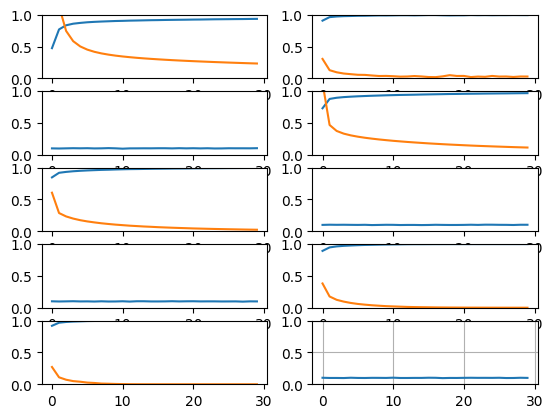

In [ ]:
print(histories)

fig, axs = plt.subplots(5,2)
plt.grid(True)
for i, h in enumerate(list(histories.values())):
    print(f"Plotting at {i%5}, {i%2}")
    axs[i%5,i%2].plot(h.history['accuracy'])
    axs[i%5,i%2].plot(h.history['loss'])
    axs[i%5,i%2].set_ylim(0,1)
    # pd.DataFrame(history.history).plot(axs)

fig.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [9]:
iris = load_iris()
X = iris.data[:, (2,3)] # petal length and width
y = (iris.target == 0).astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## Multilayer Perceptron

![Linear model diagram](https://media.datacamp.com/legacy/v1725638284/image_bd3b978959.png)

The input layer uses __passthrough__ TLUs,
There can be multiple middle (or __hidden__) layers. Each layer also has a single bias neuron and all neurons in a layer are connected to all neurons in the next layer.
The final __output__ layer provides the final result.

### Backpropagation

Training algorithm.
1. Makes a prediction for each training instance in a small batch.
2. Calculates error.
3. Goes back through each layer in reverse order to measure contribution of each connection to the error.
4. Then applies **gradient descent** to tweak the connection weights.

### Activation functions

Backpropagation does not work with the step function because of how gradient descent works (TODO: Understand this)

Logistic function was the first alternative used:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
The derivative is not 0 at any point --> gradient descent can always work.
Ranges from 0 to 1.

Hyperbolic tangent:
Ranges from -1 to 1 and is also continuous and differentiable.
Centered around 0 can help speed up convergence (TODO: WHY???)
$$
\tanh(z) = 2\sigma(2z) - 1
$$

Rectified Linear Unit function:
Not differentiable at 0 and gradient 0 at < 0, but very fast.
$$
R(z) = max(0, z)
$$
